In [ ]:
#importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loaded the data
data=pd.read_csv('/content/drive/MyDrive/DATA ANALYST PRIGRAM/python learning/project 3 EDA/titanic_train_1.csv')

In [ ]:
#basic and initial data exploration
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [ ]:
# Here we are droping irrelavent columns from dataset
#because they are non numaric excpt fare and not used in further analysis
data.drop(['PassengerId', 'Name', 'Ticket', "Fare"], inplace=True, axis=1)


In [ ]:
#and after removing that columns checking the dataset
data.head()

,Survived,Pclass,Gender,Age,Cabin
0,0,3,male,22.0,NaN
1,1,1,female,38.0,C85
2,1,3,female,26.0,NaN
3,1,1,female,35.0,C123
4,0,3,male,35.0,NaN


<Axes: >

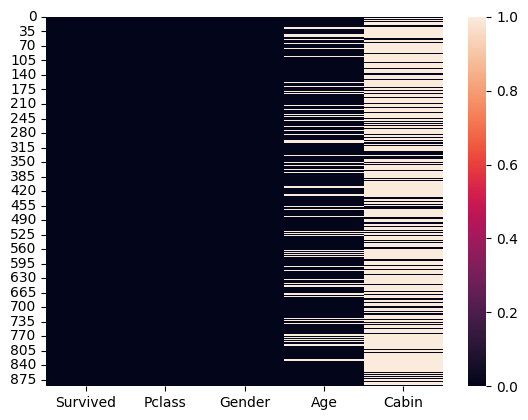

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
#By observing the above heatmap, we can analyze that
#the Cabin column has a significantly higher proportion of missing values compared to the Age column

In [ ]:
 print(data.isnull().sum())
# This gives the idea about columns that contain null values

Survived      0
Pclass        0
Gender        0
Age         177
Cabin       687
dtype: int64


In [ ]:
#so in that case droping that column is best option and cabin column is irrelevent in this dataset
data.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
# to check the percentage of missing values in each column.
percentage_of_null_values = data.isnull().mean()*100
print(percentage_of_null_values)

Survived     0.00000
Pclass       0.00000
Gender       0.00000
Age         19.86532
dtype: float64


In [ ]:
# to check verious types of unique values are availiable into Age column.
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
#here we can analyse this data set have many missing values and the range of ages like 20 to 35 ,35 to 50 , 50 to 80